In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [3]:
# đọc dữ liệu
df = pd.read_csv("D:\DA-Class\DA2212R1\Datasets\OnlineRetail.csv", encoding = "ISO-8859-1")

# in ra kich thuoc du lieu
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [7]:
# kiểm tra dữ liệu không bị khuyết
df['CustomerID'].notna()

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [8]:
# in những dòng ngoại lai Quantity < 0
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [9]:
#Xóa bỏ dòng ngoại lai của Quantity
df = df[df['Quantity'] >= 0]

In [10]:

# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [11]:
df1.shape

(397924, 8)

In [12]:
# xóa những dòng chứa toàn giá trị khuyết
df2 = df.dropna(how='all')

In [13]:
df2.shape

(531285, 8)

In [14]:
# giữ những dòng có ít nhất 7 giá trị không bị khuyết
df3 = df.dropna(thresh=7)

In [15]:
df3.shape

(530693, 8)

In [16]:
# xóa những hàng mà có giá trị bị khuyết trên cột CustomerID
df4 = df.dropna(subset=["CustomerID"])

In [17]:
df4.shape

(397924, 8)

In [18]:
# thay thế những giá trị bị khuyết trên cột CustomerID bằng giá trị -1
df5 = df
df5['CustomerID'] = df['CustomerID'].fillna(-1)

In [19]:
# hiển thị những dòng có CustomerID = -1 vừa được thay thế
df5[df5['CustomerID'] == -1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,-1.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,-1.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,-1.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,-1.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,-1.0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,-1.0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,-1.0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,-1.0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,-1.0,United Kingdom


In [20]:
# thay thế các giá trị bị khuyết ở cột Country bằng giá trị trước nó
df5['Country'] = df['Country'].fillna(method='ffill')

In [21]:
df5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<Axes: xlabel='Quantity'>

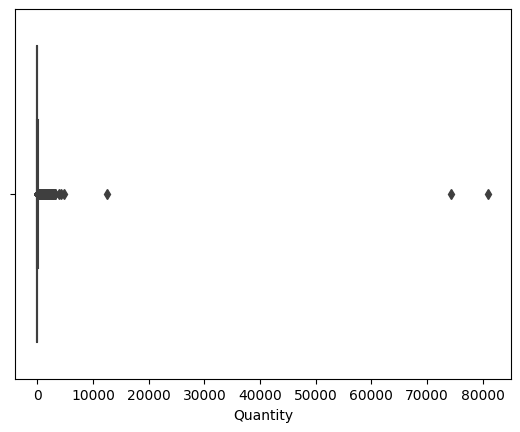

In [22]:
sns.boxplot(x=df1['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

Xóa dữ liệu ngoại lai bằng IQR score

In [23]:
Q1 = df1['Quantity'].quantile(0.25)
Q3 = df1['Quantity'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
# xác định phần tử không phải ngoại lai
df6 = df1
df6['outlier'] = ~((df1['Quantity'] < (Q1 - 1.5*IQR)) | (df1['Quantity'] > (Q3 + 1.5*IQR)))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7332\1239747105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['outlier'] = ~((df1['Quantity'] < (Q1 - 1.5*IQR)) | (df1['Quantity'] > (Q3 + 1.5*IQR)))


In [25]:
# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

<Axes: xlabel='Quantity'>

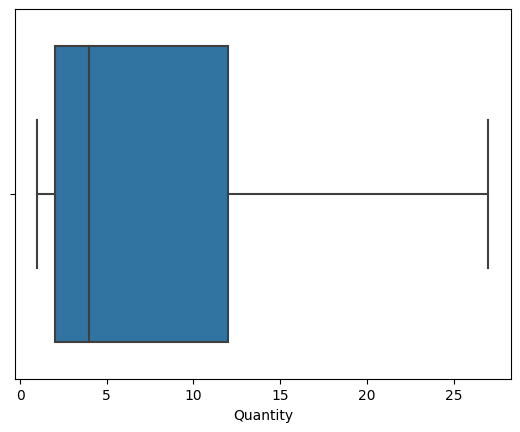

In [26]:
sns.boxplot(x=df6['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

Chuẩn hóa dữ liệu bằng

<Axes: xlabel='Quantity'>

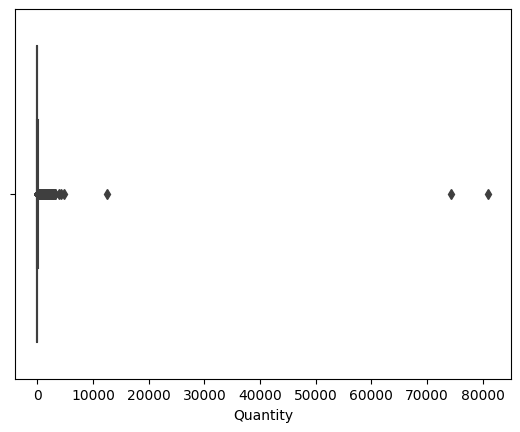

In [27]:
# vẽ biểu đồ hộp cho cột Quantity
sns.boxplot(x=df1['Quantity'])

In [28]:
# mô tả dữ liệu
df1['Quantity'].describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [29]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với MinMaxScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [30]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,397924.000000
mean,0.000148
std,0.002228
min,0.000000
25%,0.000012
50%,0.000062
75%,0.000136
max,1.000000


<Axes: >

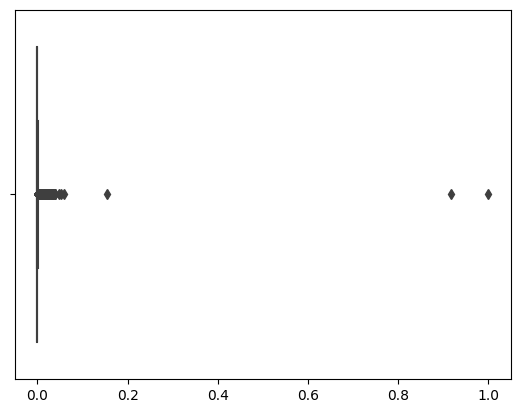

In [31]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [32]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với RobustScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [33]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,397924.000000
mean,0.702182
std,18.042021
min,-0.500000
25%,-0.400000
50%,0.000000
75%,0.600000
max,8098.900000


<Axes: >

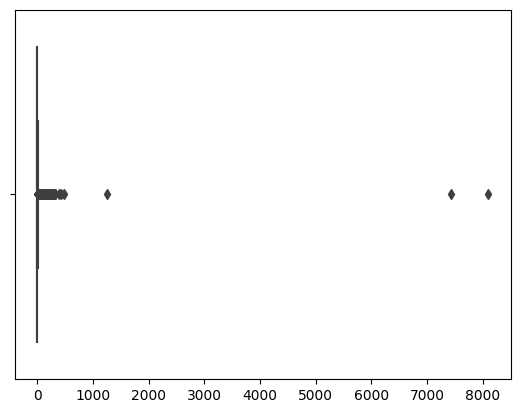

In [34]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [35]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [36]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,3.979240e+05
mean,7.142497e-19
std,1.000001e+00
min,-6.663244e-02
25%,-6.108981e-02
50%,-3.891932e-02
75%,-5.663581e-03
max,4.488526e+02


<Axes: >

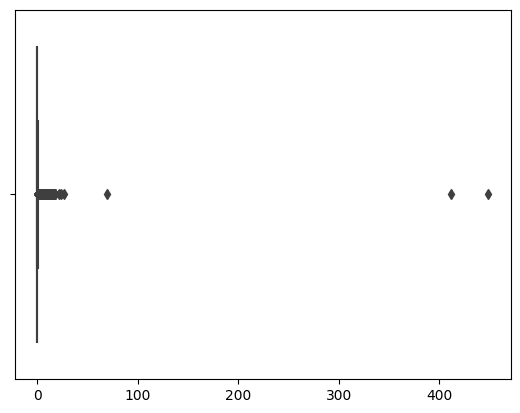

In [37]:
sns.boxplot(x=df_s)

<Axes: ylabel='Density'>

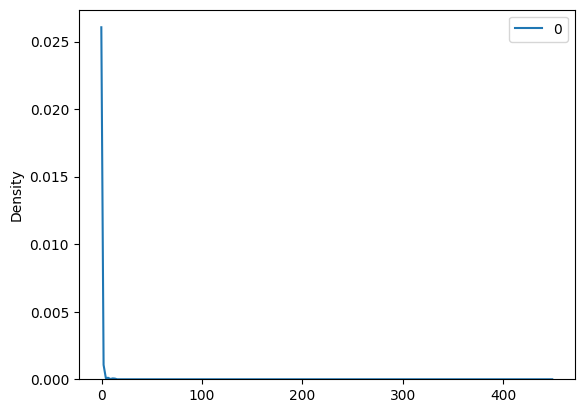

In [38]:
sns.kdeplot(data=df_s)

In [39]:
# các giá trị ở cột Country
df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [40]:
# mã hóa cột Country với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
# mã hóa cột Country với One-hot encoder sử dụng pandas
pd.get_dummies(df1['Country'])

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# mã hóa cột Country với Label encoder sử dụng scikit learn
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']))
encoded_data

array([35, 35, 35, ..., 13, 13, 13])

In [43]:
# mã hóa cột Country với Label encoder sử dụng pandas
df1['Country'].astype('category').cat.codes

0         35
1         35
2         35
3         35
4         35
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Length: 397924, dtype: int8

Rời rạc hóa dữ liệu

In [44]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,outlier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True


In [45]:
# Rời rạc hóa dữ liệu ở cột UnitPrice

# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df1['UnitPrice'], 4)
cats

0         (-8.143, 2035.688]
1         (-8.143, 2035.688]
2         (-8.143, 2035.688]
3         (-8.143, 2035.688]
4         (-8.143, 2035.688]
                 ...        
541904    (-8.143, 2035.688]
541905    (-8.143, 2035.688]
541906    (-8.143, 2035.688]
541907    (-8.143, 2035.688]
541908    (-8.143, 2035.688]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-8.143, 2035.688] < (2035.688, 4071.375] < (4071.375, 6107.062] < (6107.062, 8142.75]]

In [46]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-8.143, 2035.688]      397915
(2035.688, 4071.375]         6
(4071.375, 6107.062]         2
(6107.062, 8142.75]          1
Name: UnitPrice, dtype: int64

In [47]:
# chia thành 4 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df1['UnitPrice'], 4)
cats

0            (1.95, 3.75]
1            (1.95, 3.75]
2            (1.95, 3.75]
3            (1.95, 3.75]
4            (1.95, 3.75]
               ...       
541904     (-0.001, 1.25]
541905       (1.95, 3.75]
541906    (3.75, 8142.75]
541907    (3.75, 8142.75]
541908    (3.75, 8142.75]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1.25] < (1.25, 1.95] < (1.95, 3.75] < (3.75, 8142.75]]

In [48]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-0.001, 1.25]     140759
(1.95, 3.75]       100658
(3.75, 8142.75]     86446
(1.25, 1.95]        70061
Name: UnitPrice, dtype: int64